# Prepare Dataset and Tools

**IMPORTS**

In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbn
from keras.utils import np_utils

#Sk-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer, normalize
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, multilabel_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


**Extract Feature**

In [6]:
class CarClass:

  def __init__(self, dfs):
    self.dataframe = dfs
    self.dataset   = self.extractFeatures()
    self.target    = dfs["label"]
    self.classes   = ["suv", "sedan", "bus", "microbus", "truck", "minivan"]
    self.features  = ["width", "height", "ratio", "area"]

  def extractFeatures(self):
    width     = abs(self.dataframe["x2"] - self.dataframe["x1"])
    height    = abs(self.dataframe["y2"] - self.dataframe["y1"])
    ratio     = height / width
    area      = width * height
    diameter  = np.sqrt(width**2 + height**2)
    np.set_printoptions(precision=2, suppress=True)
    return np.array((width, height, diameter, ratio, area)).transpose()
    

**Read Dataset from Comma-Seperated Value file**

In [7]:

file_path = "cars-labeled.csv"
dfs       = pd.read_csv(file_path)

car_dataset   = CarClass(dfs)
dataset_train, dataset_test, target_train, target_test = train_test_split(car_dataset.dataset, 
                                                                          car_dataset.target, 
                                                                          random_state=0) 

encoded_train_target = LabelBinarizer().fit(target_train).transform(target_train)
encoded_test_target  = LabelBinarizer().fit(target_test).transform(target_test)


**Plot Result of Classifiers**

In [114]:
def plotResult(targets, predicts, encoded=False):
  if encoded:
    targets  = np.argmax(targets, axis=1)
    predicts = np.argmax(predicts, axis=1)

  CM = confusion_matrix(targets, predicts, normalize="true")

  sbn.heatmap(CM, annot=True, fmt=".2f", xticklabels=car_dataset.classes, yticklabels=car_dataset.classes)
  print("\nAccuracy:")
  print(accuracy_score(targets, predicts, normalize=True))

  print("\nConfusion Matrix:")
  plt.show()

# Classifiers Section

**Decision Tree**

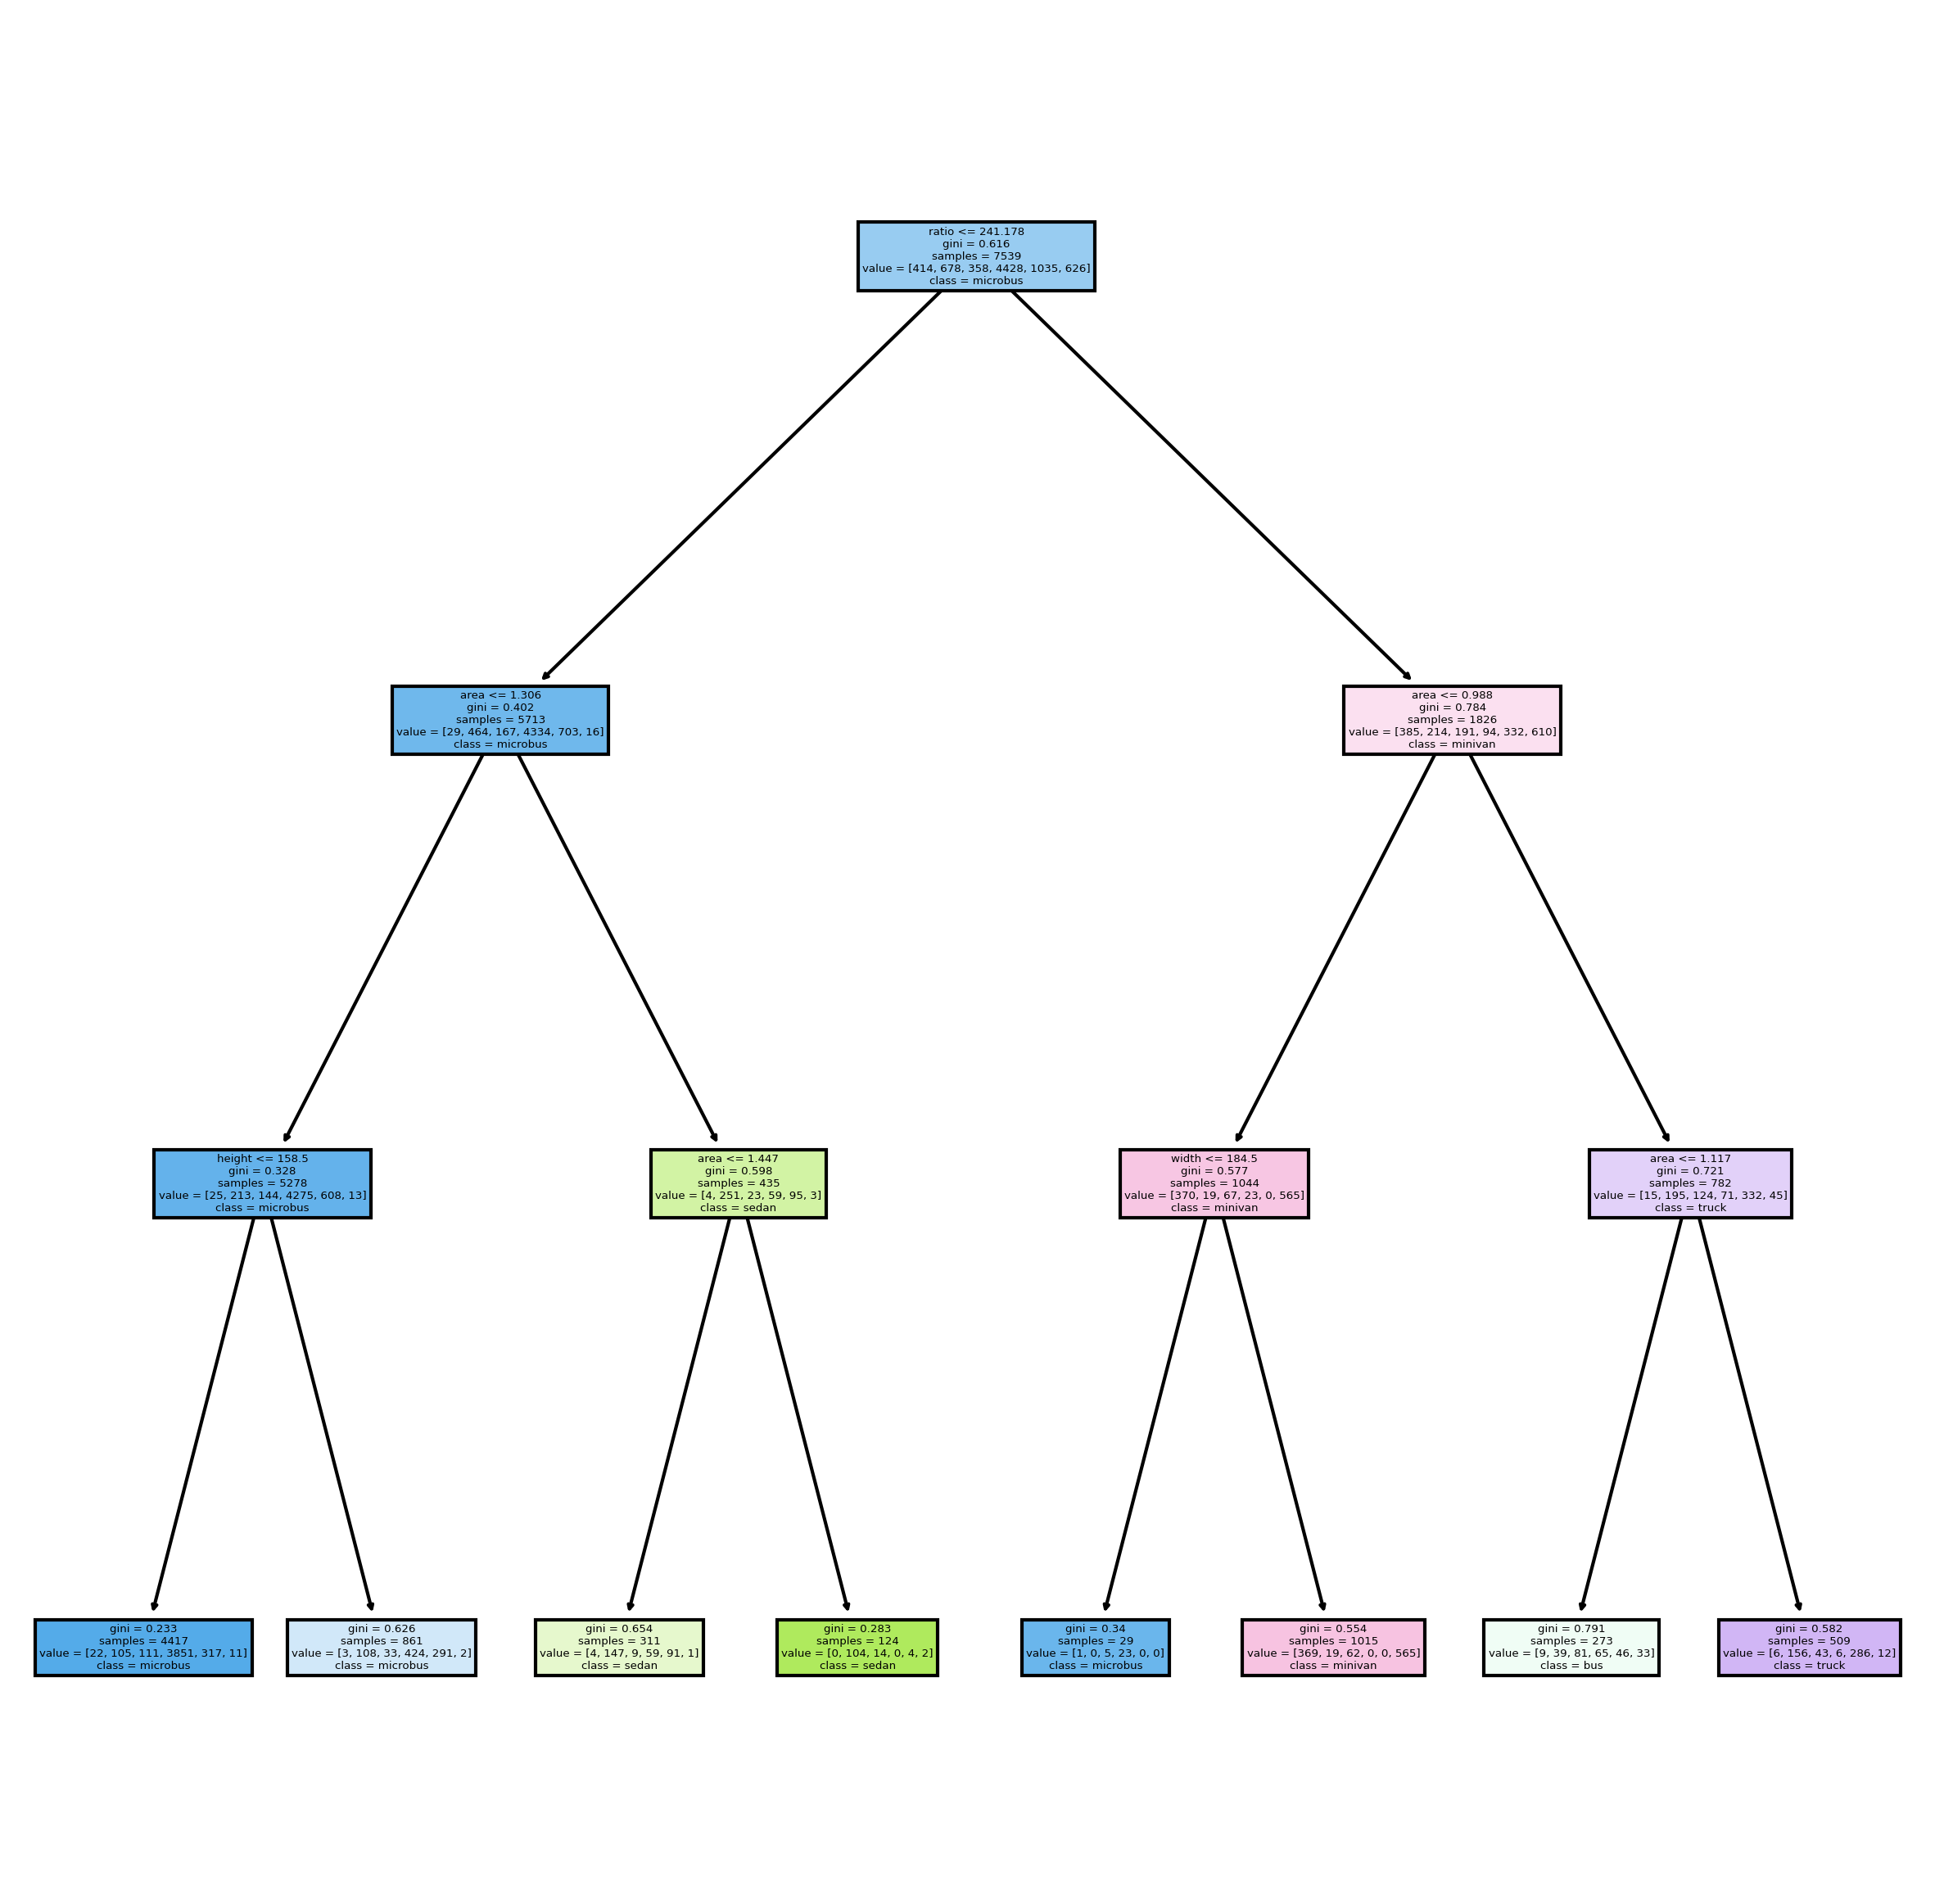

In [103]:

clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)
clf.fit(dataset_train, target_train)
clf.predict(dataset_test)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)

tree.plot_tree(clf,
               feature_names = car_dataset.features, 
               class_names = car_dataset.classes,
               filled = True);


**Random Forest**


Accuracy:
0.7255369928400954

Confusion Matrix:


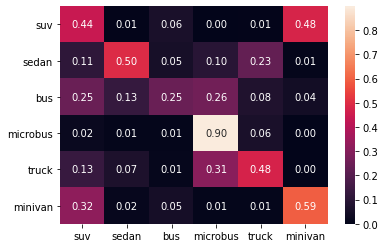

In [118]:
rf       = RandomForestClassifier(n_estimators=100,
                            random_state=0).fit(dataset_train, encoded_train_target)
predicts = rf.predict(dataset_test)
plotResult(encoded_test_target, predicts, True)


**MLP Classifier**

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Accuracy:
0.6770087509944311

Confusion Matrix:


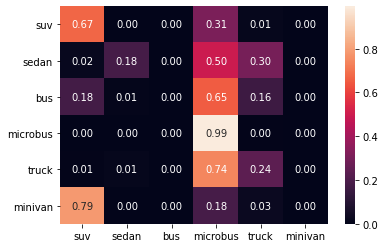

In [117]:
mlp      = MLPClassifier(activation="relu", 
                         solver="adam", 
                         random_state=1, 
                         max_iter=300).fit(dataset_train, encoded_train_target)
predicts = mlp.predict(dataset_test)

plotResult(encoded_test_target, predicts, True)


**K-Nearest Neighbors Classifire**


Accuracy:
0.665871121718377

Confusion Matrix:


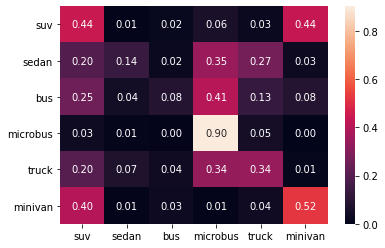

In [116]:
KN       = KNeighborsClassifier(n_neighbors=3).fit(dataset_train, encoded_train_target)
predicts = KN.predict(dataset_test)

plotResult(encoded_test_target, predicts, True)

**C-Support Vector Classification.**


Accuracy:
0.7800318217979316

Confusion Matrix:


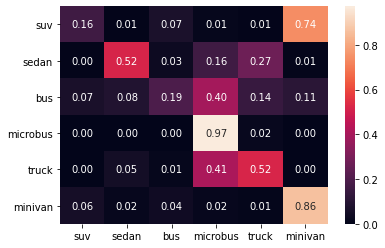

In [119]:
svc      = make_pipeline(StandardScaler(), 
                         SVC(kernel='rbf', gamma='auto', C=100)).fit(dataset_train, target_train)
predicts = svc.predict(dataset_test)
plotResult(target_test, predicts, False)

**Logistic Regression**

Accuracy:
0.7521877486077964

Confusion Matrix:


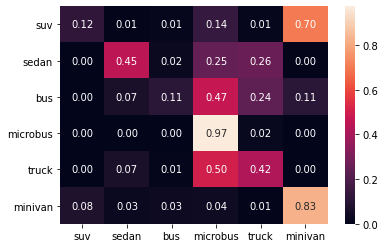

In [111]:
logistic_regression = LogisticRegression(max_iter=1000).fit(dataset_train, target_train)
predicts            = logistic_regression.predict(dataset_test)
plotResult(target_test, predicts, False)

**Naive Bayes Classifier**

Accuracy:
0.6726332537788385

Confusion Matrix:


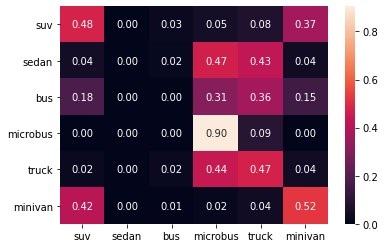

In [112]:
GNB      = GaussianNB().fit(dataset_train, target_train)
predicts = GNB.predict(dataset_test)
plotResult(target_test, predicts, False)

**AdaBoost Classifier**

Accuracy:
0.7271280827366746

Confusion Matrix:


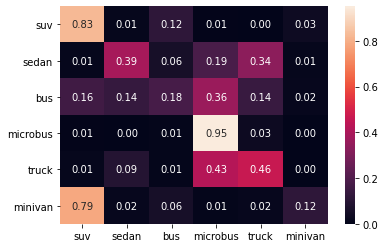

In [113]:
ABC      = AdaBoostClassifier(n_estimators=60).fit(dataset_train, target_train)
predicts = ABC.predict(dataset_test)

plotResult(target_test, predicts, False)